# CISC 1215 - Introduction to Programming Using Python
## Project Assignment
### Part A: Read-in and Exploratory Data Analysis

#### 1. Data Loading & Initial Inspection (10 pts)

To load the dataset using pandas, we first must install it on our computer. Once installed, we import the library into our jupyter notebook. We then initialize the data frame using the .read_csv() method.

If we want to specifically showcase the first 5 rows of the csv file, we use .head() with the value of 5 as the parameter.

In [77]:
import pandas as pd
df = pd.read_csv('Superstore.csv', encoding='cp1252')  # Common for Windows CSVs
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


To display the shape (rows, columns) of the data set, simply call the .shape method.

In [12]:
df.shape

(9994, 21)

If you want to find the data types of each of the columns, use the .dtypes function.

In [13]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Want a quick summary statistics, call the .describe() method to stay informed.

In [14]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### 2. Data Cleaning (20 pts)

###### How about handling missing values?


First, check if there are any missing values in the data set using the .isnull() function and you find a value that indicates that missing values exist, either drop the row/column completely or consider replacing the 'NAN'.

In [15]:
print(df.isnull().sum().sum())

0


Converting the 'Order Date' to the datetime formatt requires the use of the datetime python library so, let's first import it into our jupyter notebook.

We will also be calling the .to_datetime() method with the ['Order Date'] column to correctly update the previous format to the specified formatting. By decalring this value to the df['Order Date'], we are ensuring that this only impacts this specific column and nothing else.

In [16]:
import datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')

###### What if we wanted to check for any duplicates that may exist in the data set?

Simply call the .duplicated() method to see if such values exist, while at it, lets create a data frame to capture these duplicates.
As you can see, no duplicates exist in this data set.


In [17]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


Interested in creating a new column to capture the 'Profit Margin' for each order?

Initiallize the new column by writing the expression to evaluate such information with the help of the 'Profit' and 'Sales' columns.

In [18]:
df['Profit Margin'] = ((df['Profit'] / df['Sales']) * 100)

#### 3. Exploratory Data Analysis (EDA) (30 pts)

##### Basic Analysis

###### Which category (Furniture, Office Supplies, Technology) is most profitable?

Using the groupby() in which we filter by'Category' taking into consideration the amount of 'Profit' earned in total for each respected category by summing it all together and then displaying the top earner: Technology.

In [19]:
df.groupby('Category')['Profit'].sum().nlargest(1)

Category
Technology    145454.9481
Name: Profit, dtype: float64

###### Which region has the highest sales?
Same steps apply to finding out which region made the most sales, this time filtering by 'Region' taking into consideration the sum of the 'Sales' to then display the highest earner: West.

In [20]:
df.groupby('Region')['Sales'].sum().nlargest(1)

Region
West    725457.8245
Name: Sales, dtype: float64

###### What is the average discount per category?

Wanting to find the average discount based on 'Category' simply use the groupby() function to filter by category and apply the .mean() function for the ['Discount'] column.

In [21]:
df.groupby('Category')['Discount'].mean()

Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

##### Time-Based Analysis

How about plotting the monthly sales trend?

First, import matplotlib.pyplot to allow us to create graphs, diagrams, or visualizations for our data.

Afterwards, let's create a ['Month'] column to better sort order dates by their respective months and years to plot this information as accurately as we can. As you can see, we apply the .to_period() function to filter out the data and sum it all together to initialize a new data frame under the variable name, monthly_sales.

Lastly, plot this monthly_sales specifiying for a line graph with an appropriate title and lables for the x-axis and y-axixs.


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month', ylabel='Total Sales'>

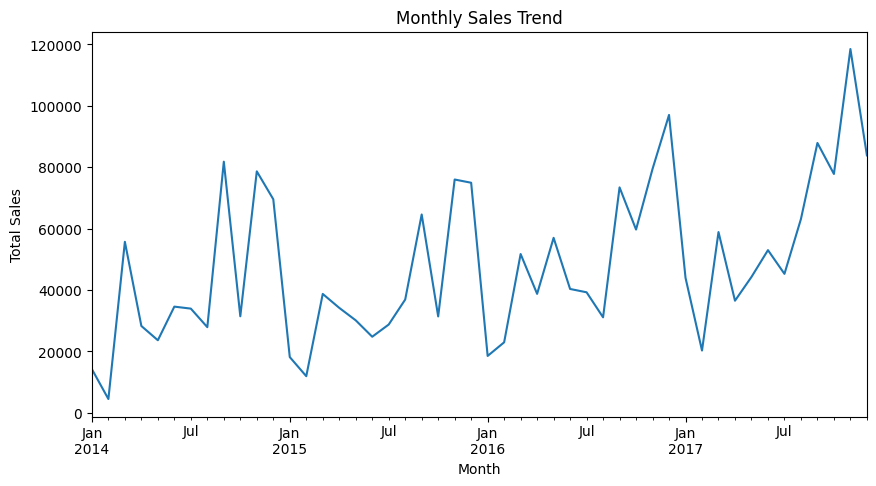

In [25]:
import matplotlib.pyplot as plt

df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trend', ylabel='Total Sales', xlabel='Month', figsize=(10,5))


###### Identify the best/worst months for profit.

Considering how we have a ['Month'] column that would allow us to filter by ['Sales'] for each period, just apply the .sum() function to then filter by the .nlargest() to filter the top 3 most profitable months and their respective years.

Same can be done for the .nsmallest() to find the 3 least profitable months.

In [23]:
df.groupby('Month')['Sales'].sum().nlargest(3)

Month
2017-11    118447.825
2016-12     96999.043
2017-09     87866.652
Freq: M, Name: Sales, dtype: float64

In [24]:
df.groupby('Month')['Sales'].sum().nsmallest(3)

Month
2014-02     4519.892
2015-02    11951.411
2014-01    14236.895
Freq: M, Name: Sales, dtype: float64

###### Does higher discounting lead to higher sales? (Scatter plot: Discount vs. Sales)

###### YES, 
higher discounting means higher sales as demonstrated by the positive correlation.


To create this scatter plot, import matplotlib,pyplot as before, create a new data fram that would allow us to group the monthly sales and discounts to then create the scatter plot with.

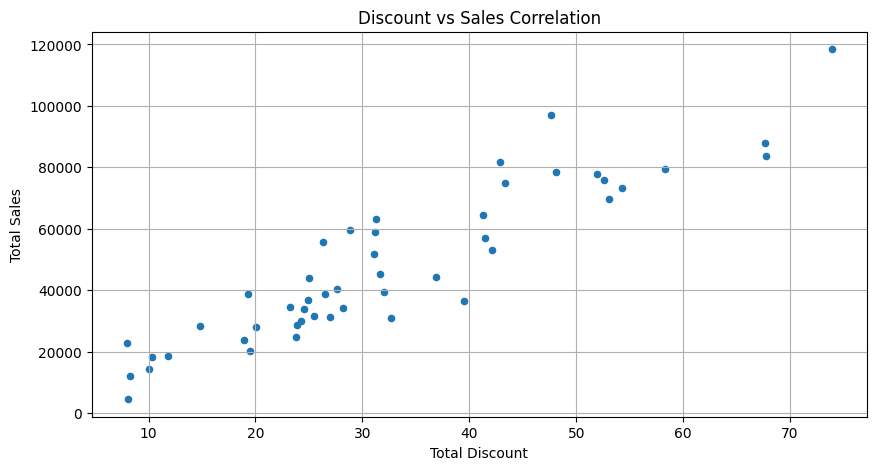

In [42]:
import matplotlib.pyplot as plt

# Create a new DataFrame that combines both
monthly_summary = pd.DataFrame({
    'Sales': df.groupby('Month')['Sales'].sum(),
    'Discount': df.groupby('Month')['Discount'].sum()
})

# Now plot scatter plot: x = Discount, y = Sales
monthly_summary.plot(kind='scatter', x='Discount', y='Sales',
                     title='Discount vs Sales Correlation',
                     figsize=(10, 5))

plt.xlabel('Total Discount')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


##### Customer Analysis

###### Who are the top 5 most profitable customers?

By applying the groubby() function to sort by 'Customer Name' to focus on the ['Profit'] column to then apply the .sum() as well as the .nlargest() for the top 5 customers, we are given this answer below.

In [39]:
df.groupby('Customer Name')['Profit'].sum().nlargest(5)

Customer Name
Tamara Chand     8981.3239
Raymond Buch     6976.0959
Sanjit Chand     5757.4119
Hunter Lopez     5622.4292
Adrian Barton    5444.8055
Name: Profit, dtype: float64

###### Which ship mode (Standard, Express, etc.) is most commonly used?

Similarly, we can apply the .value_counts() to count the number of elements that exist in each ['Ship Mode'] to then use the .head() to display the most used ship mode which is 'Standard Class'.

In [52]:
df['Ship Mode'].value_counts().head(1)

Ship Mode
Standard Class    5968
Name: count, dtype: int64

### Part B: Advanced Data Mining (20 pts)

#### 4. Data Mining (20 pts)

##### Correlation Analysis:
###### Is there a relationship between Sales, Quantity, and Profit? (df.corr())

Moderatley positive correlation between quantity and profit suggests that selling more units leads to an increase in profits.

Moderately poisitive correlation between profit and sales suggest that sales does have a somewhat strong impact on profit increases.

Low correlation between sales and quantity suggests that they do not directly impact each other.

In [54]:
df[['Sales', 'Quantity', 'Profit']].corr()

,Sales,Quantity,Profit
Sales,1.000000,0.200795,0.479064
Quantity,0.200795,1.000000,0.066253
Profit,0.479064,0.066253,1.000000


##### Anomaly Detection:
###### Find orders with unusually high Profit Margin (>50%) or losses (Profit < 0).

Using the ['Profit Margin'] column that we created before, we initialize a new data frame that filters it by checking that the profit margin > 50%. We also initialize another data frame to evaluate the losses in the ['Profit'] column.

Afterwards, we print the length of both cases as seen below.

In [83]:
df['Profit Margin'] = ((df['Profit'] / df['Sales']) * 100)

# High profit margin (> 50%)
high_margin = df[df['Profit Margin'] > 0.5]

# Orders with a loss (negative profit)
losses = df[df['Profit'] < 0]

print("High Margin Orders:", len(high_margin))
print("Loss-making Orders:", len(losses))

High Margin Orders: 8058
Loss-making Orders: 1871


##### Segmentation:
###### Group customers by Sales (High, Medium, Low) using quantiles.

In this case we initialize a new data frame called 'customer_sales' that groupsby() 'Customer ID' and 'Customer Name' to colllect the .sum() of the ['Sales'] column.

We then define the quantile and create a function to properly segment these cutomers sorting them by 'Low', 'Medium', or 'High'.

'customer_segments' will display these segmentations once we .apply() the function to the 'customer_sales' data frame.

In [76]:
customer_sales = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum()

q1 = customer_sales.quantile(0.25)  # 25th percentile
q3 = customer_sales.quantile(0.75)  # 75th percentile

def segment_customer(sales):
    if sales <= q1:
        return 'Low'
    elif sales <= q3:
        return 'Medium'
    else:
        return 'High'

customer_segments = customer_sales.apply(segment_customer)

print(customer_segments)

Customer ID  Customer Name     
AA-10315     Alex Avila              High
AA-10375     Allen Armold             Low
AA-10480     Andrew Allen          Medium
AA-10645     Anna Andreadi           High
AB-10015     Aaron Bergman            Low
                                    ...  
XP-21865     Xylona Preis          Medium
YC-21895     Yoseph Carroll          High
YS-21880     Yana Sorensen           High
ZC-21910     Zuschuss Carroll        High
ZD-21925     Zuschuss Donatelli    Medium
Name: Sales, Length: 793, dtype: object
